<a href="https://colab.research.google.com/github/Rubnserrano/TF-Certification/blob/main/05_curso_tf_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.)Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

2.)Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

3.)Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

4-)Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [1]:
import tensorflow as tf
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 


--2022-11-06 11:20:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   218MB/s    in 0.7s    

2022-11-06 11:20:27 (218 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip','r')
zip_ref.extractall()
zip_ref.close()

In [3]:
data_dir = '/content/10_food_classes_10_percent/'
train_dir = data_dir + 'train'
test_dir = data_dir + 'test'

In [28]:
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images')

There are 2 directories and 0 images
There are 10 directories and 0 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 10 directories and 0 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images


In [5]:
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical',
                                                                            batch_size = 32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


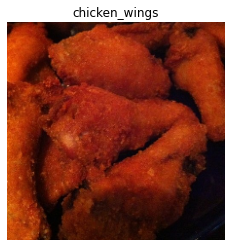

In [171]:
import matplotlib.pyplot as plt
import random
class_names = ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburguer', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']
def plot_random_image(ds, batch_size = 32, class_name = random.sample(class_names, 1)):
  one = ds.take(1)
  
  for images, labels in one:
    rand_index = random.randint(0,batch_size-1)
    while(class_names[labels[rand_index].numpy().argmax()] != class_name):
          rand_index = random.randint(0,batch_size-1)
    plt.imshow(images[rand_index].numpy().astype("uint8"))
    title = class_names[labels[rand_index].numpy().argmax()]
    plt.title(title)
    plt.axis(False)

plot_random_image(train_data_10_percent, 32, 'chicken_wings')

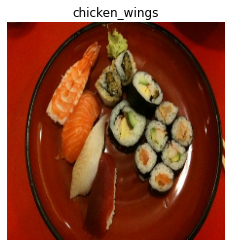

In [165]:
plot_random_image(train_data_10_percent, 32, 'chicken_wings')

AttributeError: ignored

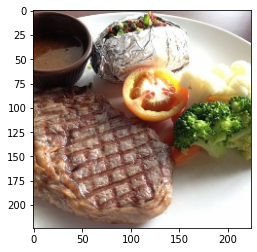

In [21]:
plot_random_image(train_data_10_percent)